                                   Adam Mamitch
                                    GEOG 464
                                   Winter 2023
                                  Term Project

Introduction

Montreal like many other North American cities, has experienced significant social and demographic change to sustain population growth brought on mainly by foreign immigration.
As the most multilingual city in Canada, where the majority of the population speaks at least two or more languages, the island of Montreal draws in many immigrants from a variety of places, including Africa, Europe, Asia, Latin America, and the Caribbean (Perez et al., 2019). According to Leloup et al. (2018), Montreal’s geographical evolution from immigration since the 1980s, has been affected by a number of traits that have been linked to a potential rise in income inequality, including sustained economic growth, economic restructuring that has harmed traditional industries. These factors have contributed to the employment market becoming more and more divided, with certain industries in need of highly skilled labour and others in need of less skilled workers. As a result of this division, there are now distinctions between the islands boroughs, that heavily are affected by things like sex, age, and immigration status. It has also been studied that despite the fact that diverse locations offer the best chance for quicker economic integration, many immigrants find it more comfortable to settle in large-city ethnic enclaves.

Methods & Data

For my project I wanted to geographically visualize the amount immigrants in each borough on the Island of Montreal and then further explorer these results in what's casuing these disparities. The first thing I did was search for quantitaive immigration data for the island of Montreal, to be able to incorporate it into python. Through the ville de Montreal website (Ville de Montreal. 2016), I found a excel file containing numerous borough statistitics such as total population, and amount of immigrants. In regards to the data, it is important to note they study defines an immigrant as a person born outside of Canada who the immigration authorities have granted the right to reside in Canada permanently (some of immigrants are Canadian citizens, while others are not (Ville de Montreal. 2016).


Below I further discuss my steps into incorporating the data into python.

In [1]:
!pip install pandas   #Install all our necessary libraries to easier work with the imported data, and the necessary create maps.
!pip install geopandas
!pip install matplotlib
!pip install folium
!pip install mapclassify


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib
import glob
import folium

Once I added the quantitative data into my Term Poject folder, I then had to import the data as a csv file into Python, and assignn the glob function. This function, which stands for global, is used to look for files that match a given file pattern or name. Once I did this, I was then able to access my data which I name im_data (short for immigration data).

In [3]:
ImmigrationData = glob.glob('*.csv') #Bring in and assign the .csv file 
ImmigrationData = ImmigrationData[0]
im_data = pd.read_csv(ImmigrationData)
pd.set_option('display.max_rows', None)
im_data.head(100)

,Geography,Total_Population,Immigrant_Population_Number
0,Montréal,"1,663,220","570,940"
1,Dollard-Des Ormeaux,"48,275","19,130"
2,Côte-Saint-Luc,"31,430","14,090"
3,Pointe-Claire,"30,065","7,945"
4,Mont-Royal,"19,860","6,945"
5,Kirkland,"19,930","5,735"
6,Westmount,"19,780","5,265"
7,Dorval,"18,565","4,810"
8,Beaconsfield,"19,025","4,420"
9,Hampstead,"6,965","1,985"


The next step was to find a geojson file, to be able to later format my im_data into geographic data structures.
 I decided to use the limites-administratives-agglomeration-nad83.geojson file used in lab 4 and lab 5 from my class. Since both my .csv and geojson file has the Island Borough names in common, I was able to merge both data through the pd.merge option where I merged NOM with Geography.

In [4]:
gdf_muni = gpd.read_file('limites-administratives-agglomeration-nad83.geojson')

In [5]:
data_merged = pd.merge( #this is for an interactive map, shwoing each borough name, total population, and immigrant population
    gdf_muni,
    im_data,
    how="inner",
    on=None,
    left_on='NOM',
    right_on='Geography',
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)

The first map I decided to create was using the .explore option in python, to create an insightful interactive map that easily allows any user to select a Montreal borough, and find all the relevent information relating to my topic; population amount, number of immigrants, and Borough name.

In [6]:
data_merged.explore(column='Geography', legend=None, style_kwds={"color": "black", "weight":2, "opacity":0.4})

In [15]:
data_merged.dtypes

CODEID                                        int64
NOM                                          object
NOM_OFFICIEL                                 object
CODEMAMH                                     object
CODE_3C                                      object
NUM                                           int64
ABREV                                        object
TYPE                                         object
COMMENT                                      object
DATEMODIF                                    object
geometry                                   geometry
Geography                                    object
Total_Population                            float64
Immigrant_Population_Number                 float64
Immigrant_Percentage_Total_Population       float64
Immigrant_Percentage_Burough_Population     float64
dtype: object

In [8]:
data_merged['Immigrant_Population_Number'] = data_merged['Immigrant_Population_Number'].str.replace(',', '').astype(float)

data_merged.apply(pd.to_numeric)

ValueError: Unable to parse string "Ahuntsic-Cartierville" at position 0

In [9]:
data_merged['Total_Population'] = data_merged['Total_Population'].str.replace(',', '').astype(float)

data_merged.apply(pd.to_numeric)

ValueError: Unable to parse string "Ahuntsic-Cartierville" at position 0

The next step I took was creating 2 new columns in my data set, one called Immigrant_Pecentage_Total_Population; which looks at the amount of immigrants relative to the total population. I did this by dividing each row of immigrant population for each borough by the sum of the total population of all the boroughs.

The second coloumn was Immigrant_Percentage_Burough_Population which simply divided the immigrant population from each borough by the total population of the that borough.

I created this data to be able to later on create 2 maps, tha'll both look at immigrant population for each borough in different ways.

In [10]:
data_merged['Immigrant_Percentage_Total_Population'] = (data_merged.Immigrant_Population_Number / data_merged.Total_Population.sum()) * 100

In [11]:
data_merged['Immigrant_Percentage_Burough_Population'] = (data_merged.Immigrant_Population_Number / data_merged.Total_Population) * 100

In [12]:
data_merged.head()

,CODEID,NOM,NOM_OFFICIEL,CODEMAMH,CODE_3C,NUM,ABREV,TYPE,COMMENT,DATEMODIF,geometry,Geography,Total_Population,Immigrant_Population_Number,Immigrant_Percentage_Total_Population,Immigrant_Percentage_Burough_Population
0,17,Ahuntsic-Cartierville,Ahuntsic-Cartierville,REM23,AHU,24,AC,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((284196.858 5041365.741, 284600...",Ahuntsic-Cartierville,134245.0,51940.0,2.707800,38.690454
1,34,Anjou,Anjou,REM09,ANJ,9,AJ,Arrondissement,NaN,2022-08-24,"MULTIPOLYGON (((296755.427 5052363.388, 296820...",Anjou,42796.0,13995.0,0.729605,32.701654
2,26,Baie-D'Urfé,Baie-D'Urfé,66112,BDU,71,BU,Ville liée,NaN,2022-08-24,"MULTIPOLYGON (((270853.917 5028851.811, 271207...",Baie-D'Urfé,3715.0,965.0,0.050309,25.975774
3,25,Beaconsfield,Beaconsfield,66107,BEA,7,BF,Ville liée,NaN,2022-08-24,"MULTIPOLYGON (((278333.867 5034002.589, 278331...",Beaconsfield,19025.0,4420.0,0.230429,23.232589
4,27,Côte-Saint-Luc,Côte-Saint-Luc,66058,CSL,72,CL,Ville liée,NaN,2022-08-24,"MULTIPOLYGON (((290504.379 5035932.981, 290622...",Côte-Saint-Luc,31430.0,14090.0,0.734557,44.829780


Text(0.5, 1, 'Percentage of Immigrants per Borough Relative to Total Island Population, 2016')

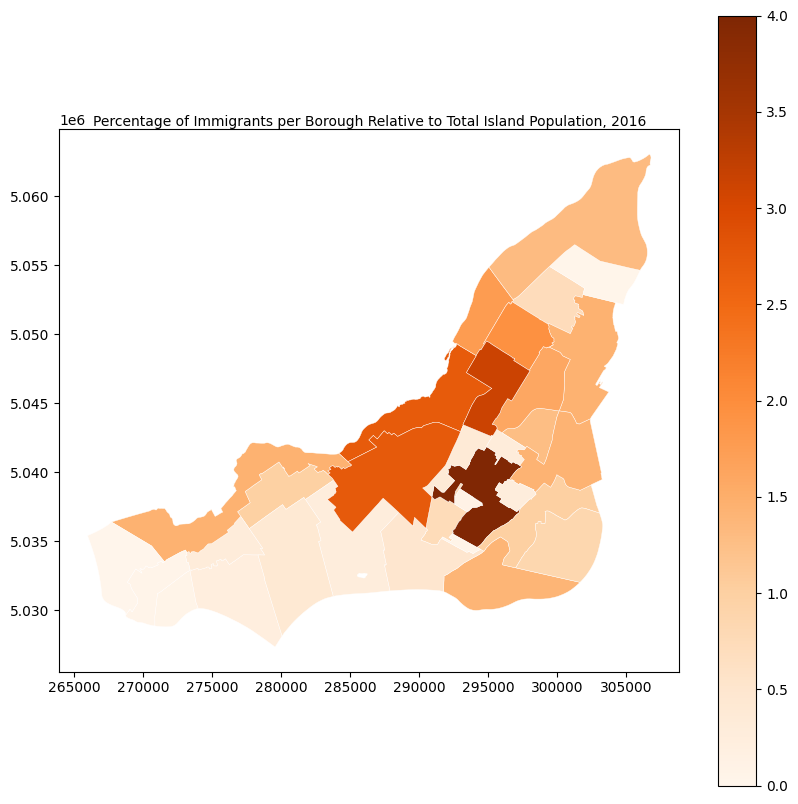

In [13]:
ax = data_merged.plot(
    'Immigrant_Percentage_Total_Population'
    ,figsize=(10,10)
    ,edgecolor="#fff"
    ,linewidth=0.3
    ,vmax=4
    ,vmin=0
    ,legend=True
    ,cmap="Oranges"
)

ax.annotate(
    "Percentage of Immigrants per Borough Relative to Total Island Population, 2016",
    (0.5,1)
    ,xycoords = 'axes fraction'
    ,horizontalalignment='center'
    ,verticalalignment='bottom'
    ,fontsize = 10
    ,color='#000'
    ,fontstyle='normal'
)

If we look at the first map wich compares amount of immigrants to total population of all the boroughs we can see that Côte-des-Neiges–Notre-Dame-de-Grâce borough has the highest number of immigrants among all the other boroughs on the island. The 76,215 immigrants residing there account for around 5% of the total population of Montreal. The Côte-des-Neiges neighbourhood, is is situated on the northern slope of Mount Royal, is currently one of Montreal's most international neighbourhoods. This borough not only has the highest population of all on the island, but the highest rate of poverty amognst individual. These marginalised statuses frequently coexist in the Côte-des-Neiges region with recent immigration or refugee status to Quebec. The effects of this accumulation results in a high immigration level due to poverty (Montgomery et al. 2000).

Text(0.5, 1, 'Percentage of Immigrants per Borough Relative to Total Borough Population 2016')

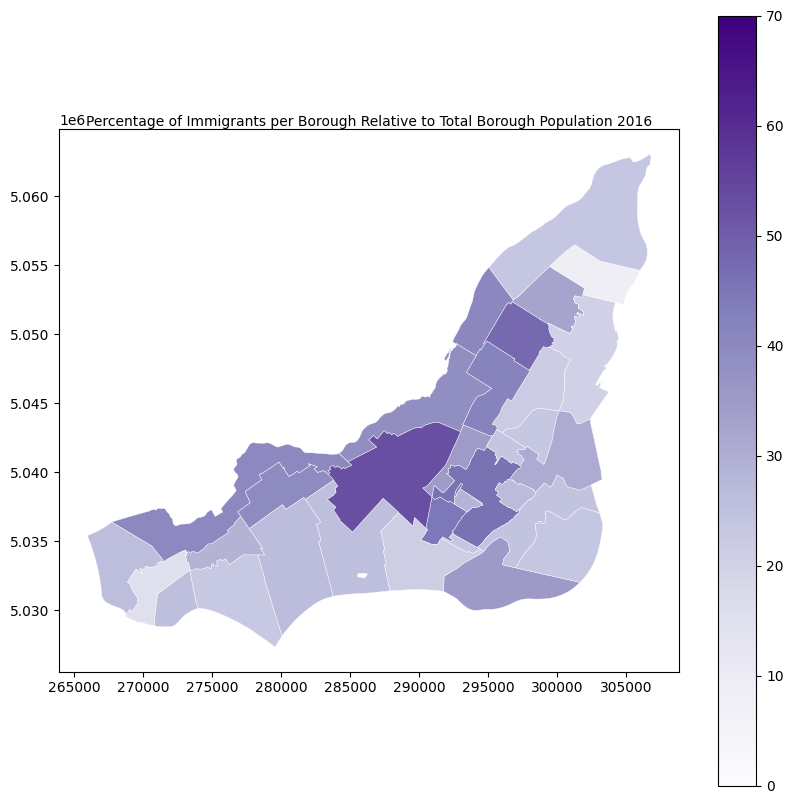

In [14]:
ax = data_merged.plot(
    'Immigrant_Percentage_Burough_Population'
    ,figsize=(10,10)
    ,edgecolor="#fff"
    ,linewidth=0.3
    ,vmax=70
    ,vmin=0
    ,legend=True
    ,cmap="Purples"
)

ax.annotate(
    "Percentage of Immigrants per Borough Relative to Total Borough Population 2016",
    (0.5,1)
    ,xycoords = 'axes fraction'
    ,horizontalalignment='center'
    ,verticalalignment='bottom'
    ,fontsize = 10
    ,color='#000'
    ,fontstyle='normal'
)


While Côte-des-Neiges-Notre-Dame-de-Grâce borough has the most immigrants overall. It is Saint-Laurent that has the highest concentration of immigrants within its borough, with 54% of the population being born outside of the country. According to Leloup et al. (2018), housing appears to be the main prevalent reason for the congregation of immigrants in this borough. As a majority immigrant are forced to rent their homes and a sizeable fraction of them pay more than 30% of their income in rent, afforable housing is can be difficult to find. With St-Laurent having an overabundance of five-story or higher structures, it makes sense why many choose this borough to make it their home, as housing is much more affordable in this borough.


                                        References

Leloup, Xavier, Damaris Rose, and Richard Maaranen. 2018. “The New Social Geography of Montreal: The socio-spatial evolution of income distribution between 1980 and 2015 in the Montreal Metropolitan Area.” Montreal : Institut national de la recherche scientifique.

Montgomery, C., et al. (2000) "Profils de la pauvrêté et de l’immigration à Côte-des-Neiges." Interaction 4.1: 77-95.

Perez, L., Dragicevic, S., & Gaudreau, J. (2019). A geospatial agent-based model of the spatial urban dynamics of immigrant population: A study of the island of Montreal, Canada. Plos one, 14(7).

Ville de Montreal. (2016). Immigration. Montreal en Statistique. Retrieved from: http://ville.montreal.qc.ca/portal/page?_pageid=6897,67885704&_dad=portal&_schema=PORTAL on 04/10/2023